### Разметка данных датафрейма `ВкусВилл`

In [1]:
import pandas as pd
from transformers import pipeline

#### Пояснения по библиотеке Transformers 

`Введение в библиотеку Transformers и платформу Hugging Face`

Платформа Hugging Face это коллекция готовых современных предварительно обученных Deep Learning моделей. А библиотека Transformers предоставляет инструменты и интерфейсы для их простой загрузки и использования. Это позволяет вам экономить время и ресурсы, необходимые для обучения моделей с нуля.

* https://habr.com/ru/articles/704592/
* https://huggingface.co/


In [2]:
# Загрузка датафрейма
df_vv = pd.read_csv('../pars/data/vkus_vils_products.csv')

In [3]:
# Создадим копию датафрейма
df = df_vv.copy()

In [4]:
# Модель RuBERT-tiny2, адаптированная для классификации коротких текстов на русском языке по тональности. 
model = pipeline(model="seara/rubert-tiny2-russian-sentiment")

Xformers is not installed correctly. If you want to use memorry_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.


In [5]:
df.columns

Index(['author', 'comment', 'date', 'url', 'product', 'stars', 'price',
       'currency', 'weight'],
      dtype='object')

### Сведения о датафрейме ВкусВилл
ВкусВилл — интернет-магазин продуктов для здорового питания https://vkusvill.ru/

Датафрейм был собран с использованием библиотеки Selenium

- `author`  -  Автор отзыва;
- `comment` -  Отзыв о покупке
- `date`    -  Дата покупки и номер дисконтной карты
- `url`     -  Веб адрес продукта (товара)
- `product` -  Инфо о продутке (название)
- `category`-  Категоря товара
- `stars`   -  Количество звезд оставленный покупателем
- `price`   -  Стоимость товара на момент покупки
- `currency`-  Валюта
- `weight`  - Единица измерения товара 

Данные не содержат целевой переменной

Пропусков и выбросов нет

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4395 entries, 0 to 4394
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   author    4395 non-null   object
 1   comment   4395 non-null   object
 2   date      4395 non-null   object
 3   url       4395 non-null   object
 4   product   4395 non-null   object
 5   stars     4395 non-null   int64 
 6   price     4395 non-null   int64 
 7   currency  4395 non-null   object
 8   weight    4395 non-null   object
dtypes: int64(2), object(7)
memory usage: 309.1+ KB


In [7]:
df.isnull().sum()

author      0
comment     0
date        0
url         0
product     0
stars       0
price       0
currency    0
weight      0
dtype: int64

In [8]:
df.sample(8)

,author,comment,date,url,product,stars,price,currency,weight
400,Виктория,"1 недозрел, другой перезрел",13 мая 2025 · Карта: xxx02,https://vkusvill.ru/goods/avokado-khass-2-sht-...,"Авокадо Хасс, 2 шт",3,270,руб,/шт
898,Ирина,"Шикарный арбуз, маленький, меньше 6 кг, но сла...",16 мая 2025 · Карта: xxx21,https://vkusvill.ru/goods/arbuz-iran-22413.html,Арбуз Иран,5,178,руб,/кг
739,Татьяна,"Очень вялая морковь, просто мягкая, видимо ста...",11 мая 2025 · Карта: xxx60,https://vkusvill.ru/goods/morkov-mytaya-18735....,Морковь мытая,2,102,руб,/кг
440,"Мы Нашли Вашу Карту, Ее Номер",Абрикосы с учетом не сезона очень вкусные но н...,16 мая 2025 · Карта: xxx94,https://vkusvill.ru/goods/abrikos-ferganskiy-5...,"Абрикос Ферганский, 500 г",5,370,руб,/шт
3288,Елизавета,Ужасные помидоры без вкуса.,09 мая 2025 · Карта: xxx57,https://vkusvill.ru/goods/tomaty-krasnye-na-ve...,Томаты красные на ветке,1,175,руб,/кг
3560,Лейла,Кислая,16 мая 2025 · Карта: xxx46,https://vkusvill.ru/goods/klubnika-krasnodar-4...,Клубника Краснодар,3,898,руб,/кг
2109,Нина,Мне понравились вкусные,12 мая 2025 · Карта: xxx65,https://vkusvill.ru/goods/grusha-vilyams-22334...,Груша Вильямс,5,342,руб,/кг
3895,ЕЛЕНА АЛЕКСАНДРОВНА,Не вкусные.,07 апр 2025 · Карта: xxx71,https://vkusvill.ru/goods/yabloko-gala-15846.html,Яблоко Гала,4,205,руб,/кг


### Разметка целевой переменной

На данный момент мы можем разметить целевую переменную только по признаку `stars`, так как он отражает настроение и посыл покупателя. Но исследовав сами отзывы, можно встретить несоответсвие, например когда количество звезд 5, а сам отзыв негативный. Сколько таких отзывов мы не знаем.

В качестве эксперемента произведем разметку дынных несколькими способами. За основу разметки целевой переменной возьмем следующие поля 'comment' и 'stars':

- `comment` - Оставленный отзыв покупателем;
- `stars` - Количество звезд оставленный покупателем;

 1. С помощью нейросети RuBERT-tiny2. Предварительно никак не будем обработывать признак `comment` т.е разметим данные в исходном виде;
 2. Используем признак `stars` (от 1-3 негивный отзыв, от 4-5 позитивный отзыв)
 3. Посторим разметку нейросетью RuBERT-tiny2 признака `comment` после след. предобработки (токенизацию, морфологический анализ, лемматизацию, удаление стоп-слов)

На выходе обучающий датафрейм будет иметь 3 целевые переменные.

Целевая переменная будет иметь 1 - позитивный отзыв, 0 - негативный отзыв.

### Разметка целевой переменной

In [9]:
# Создадим 2 фукции разметки
# Функция разметки коментариев с использованим модели Модели нейросети RuBERT-tiny2

def get_label_bert(text: str, model: model) -> str:
    label_ru = {'neutral': '0', 
                'positive': '1', 
                'negative': '0'}
    label = model[0]['label']
    score = model[0]['score']
    
    return label_ru[label] #, round(score, 2)

# Функция разметки коментариев с использованим поля stars (от 1-3 негивный отзыв, от 4-5 позитивный отзыв)

def get_label_stars(num_stars: int) -> int:
    if num_stars in (1, 2, 3):
        return 0  # отзыв негативный
    else:
        return 1  # отзыв позитивный

#### 1. Разметка с помощью нейросети RuBERT-tiny2 (адаптированная для классификации коротких текстов на русском языке по тональности).
- https://huggingface.co/seara/rubert-tiny2-russian-sentiment

ruBERT-tiny2 представляет собой небольшую версию BERT (Bidirectional Encoder Representations from Transformers), специально адаптированную для работы с русским языком. Эта модель разработана для выполнения различных задач обработки естественного языка и текстового анализа.

In [10]:
from tqdm.auto import tqdm
tqdm.pandas()
# Создаем колонку с целевой переменной "target_by_RuBRT-tiny_no_tokens". Разметим комментарии с использованием нейро сети RuBRT-tiny

df['target_by_RuBRT-tiny_no_processing'] = df['comment'].progress_apply(lambda x: get_label_bert(x, model(x))).astype('int8')

  0%|          | 0/4395 [00:00<?, ?it/s]

#### 2. Разметка с помощью признака `stars` (будем исходить из того, что от 1 - 3 негативный отзыв, и от 4 - 5 позитивный отзыв)

In [11]:
# Создаем 2 колонку с целевой переменной "target_by_stars". Разметим комментарии с использованием признака stars
df['target_by_stars'] = df['stars'].apply(get_label_stars)

In [12]:
# Проверим результат работы функций get_label_bert, get_label_stars
df[['comment','target_by_RuBRT-tiny_no_processing', 'target_by_stars']].sample(7)

,comment,target_by_RuBRT-tiny_no_processing,target_by_stars
2066,Хорошие огурцы,1,1
3013,Дыня-сладкий мед. Очень вкусно.,1,1
1840,Очень сладкие и в меру сочные мандарины 🍊,1,1
3555,В день покупки клубника была отличнейшего каче...,0,0
4030,Покислее узбекский. Вкусные сочные.,1,1
3126,"Хороший плотный лук, в шелухе",1,1
2614,Ставлю 5звёзд за то что привезли ровный не зел...,0,1


#### Для разметки по 3 пунку неоходимо произвести предобработку

In [13]:
# Импорт неоходимых библиотек
import re # регулярные выражения
import numpy as np

# лингивистические модули
from razdel import tokenize  # сегментация русскоязычного текста на токены и предложения https://github.com/natasha/razdel
import pymorphy2  # Морфологический анализатор

In [14]:
# лингивистический модуль nltk (импортируем стоп-слова)
import nltk
from nltk.corpus import stopwords

### Пояснения по импортируемым лингивистическим модулям:

##### `Модуль razdel (Natasha)`
Библиотека Natasha имеет множество функций включая токенизацию, морфологический анализ, лемматизацию, синтаксический анализ и извлечение именованных сущностей.
Токенизация и сегментация текста на предложения и токены в Natasha осуществляются с помощью встроенной библиотеки Razdel:
* https://github.com/natasha/razdel
* https://natasha.github.io/razdel
* https://habr.com/ru/companies/otus/articles/808435/

##### `Морфологический анализатор pymorphy2`
PyMorphy2 также предоставляет функции для морфологического анализа текстов, PyMorphy2 полностью открыта и развивается сообществом. Библиотека использует словари OpenCorpora для анализа и может работать с русским. PyMorphy2 также предлагает API:
* https://pymorphy2.readthedocs.io/en/stable/
* https://habr.com/ru/companies/otus/articles/808435/

##### `Модуль NLTK`
NLTK — это свободно распространяемая библиотека Python, разработанная для работы с человеческим языком. Это комплексный набор инструментов, предназначенный для символьной и статистической обработки естественного языка. Она предоставляет легкий доступ к более чем 50 корпусам текстов и лексическим ресурсам, таким как WordNet, а также набор библиотек для классификации, токенизации, стемминга, метки частей речи, синтаксического анализа и семантического рассуждения:
* https://habr.com/ru/companies/otus/articles/774498/

In [15]:
# Создадим список стоп-слов из модуля NLTK
nltk.download('stopwords')
stopwords_ru = stopwords.words('russian')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/w_lander/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
# Кол-во стоп слов в списке
print(len(stopwords_ru))

151


In [17]:
# Посмотрим содержимое списка
stopwords_ru[:10]

['и', 'в', 'во', 'не', 'что', 'он', 'на', 'я', 'с', 'со']

In [18]:
# Уберем частицу не из словаря стоп-слов
stopwords_ru.remove('не')

In [19]:
# Дополним стоп-слова из внешнего локального словаря
with open('stopwords.txt') as f:
    additional_stopwords = [w.strip() for w in f.readlines() if w]
    
stopwords_ru += additional_stopwords

In [20]:
# Кол-во стоп слов в словаре c дополнением
print(len(stopwords_ru))

524


In [21]:
# Функция очистки отзывов от лишних пробелов, символов и тд. и тп
def clean_text(text):
    '''
    очистка текста
    на выходе очищеный текст
    '''
    if not isinstance(text, str):
        text = str(text)
    
    text = text.lower()
    text = text.strip('\n').strip('\r').strip('\t')
    text = re.sub("-\s\r\n\|-\s\r\n|\r\n", '', str(text))
    text = re.sub("[0-9]|[-—.,:;_%©«»?*!@#№$^•·&()]|[+=]|[[]|[]]|[/]|", '', text)
    text = re.sub(r"\r\n\t|\n|\\s|\r\t|\\n", ' ', text)
    text = re.sub(r'[\xad]|[\s+]', ' ', text.strip())
    text = re.sub('n', ' ', text)
    
    return text

In [22]:
# Функция токенизации, лемматизация, удаления стоп-слов
cache = {}
morph = pymorphy2.MorphAnalyzer()

def lemmatization(text: str) -> str:
    '''
    лемматизация
        [0] если зашел тип не `str` делаем его `str`
        [1] токенизация предложения через razdel
        [2] проверка есть ли в начале слова '-'
        [3] проверка токена с одного символа
        [4] проверка есть ли данное слово в кэше
        [5] лемматизация слова
        [6] проверка на стоп-слова
    на выходе лист отлемматизированых токенов
    '''
    # [0]
    if not isinstance(text, str):
        text = str(text)
    
    # [1]
    tokens = list(tokenize(text))
    words = [_.text for _ in tokens]

    words_lem = []
    
    for w in words:
        if w[0] == '-': # [2]
            w = w[1:]
        if len(w) > 1: # [3]
            if w in cache: # [4]
                words_lem.append(cache[w])
            else: # [5]
                temp_cach = cache[w] = morph.parse(w)[0].normal_form
                words_lem.append(temp_cach)
    
    words_lem_without_stopwords=[i for i in words_lem if not i in stopwords_ru] # [6]
    
    return words_lem_without_stopwords

In [23]:
# Создаем колонку 'comment_clean' и заполним ее очищенными от лишних данных отзывами функцией clean_text
df['comment_clean'] = df['comment'].progress_apply(lambda x: clean_text(x))

  0%|          | 0/4395 [00:00<?, ?it/s]

/tmp/ipykernel_344455/3016012433.py:13: FutureWarning: Possible nested set at position 39
  text = re.sub("[0-9]|[-—.,:;_%©«»?*!@#№$^•·&()]|[+=]|[[]|[]]|[/]|", '', text)


In [24]:
# Проверим как отработа функция clean_text
df[['comment', 'comment_clean']].sample(5)

,comment,comment_clean
3550,Кислятина адская. На 1 кг ягод сладких было шт...,кислятина адская на кг ягод сладких было штук
1476,Кисловат,кисловат
1683,"не вкусно,наполовину как будто старые и сухие😕",не вкуснонаполовину как будто старые и сухие😕
3180,Всегда лук испорченный.,всегда лук испорченный
712,Пришла вся ломаная. Кусочки,пришла вся ломаная кусочки


In [25]:
# Проверим работу морфологического анализатора pymorphy2 (на вход подаём слова в разных формах, на выходе получем нормалезованную)
morph = pymorphy2.MorphAnalyzer()
morph.parse('бегали')[0].normal_form

'бегать'

In [26]:
# Проверим работу на отзывах функцию lemmatization
df['comment_clean'].iloc[100:105].apply(lambda x: lemmatization(x))

100                         [покупать, отличный, чеснок]
101    [странно, особо, корешковый, подрещать, китайс...
102    [вчера, чеснок, корешок, всё, головка, чеснок,...
103    [обычный, чеснок, высокий, цена, производство,...
104          [замечательный, крепкий, ароматный, чеснок]
Name: comment_clean, dtype: object

In [27]:
# Обработаем признак 'comment_clean' применим функцию lemmatization
df['comment_clean'] = df['comment_clean'].progress_apply(lambda x: lemmatization(x))

  0%|          | 0/4395 [00:00<?, ?it/s]

In [28]:
# Проверим как отработала функция lemmatization сравним исходную и обработанную колонку
df[['comment', 'comment_clean','target_by_RuBRT-tiny_no_processing', 'target_by_stars']].sample(6)

,comment,comment_clean,target_by_RuBRT-tiny_no_processing,target_by_stars
860,"Совсем не сладкий, дорого и невкусно (","[не, сладкий, дорого, невкусно]",0,1
4318,"Крупные,красивые!Брала по зелёной цене !","[крупныекрасивыебрать, зелёный, цена]",1,1
2532,Из дюжины картофелин три оказались испорченным...,"[дюжина, картофелина, испортить, гниль, плесень]",0,0
992,"Совсем не сладкий, хотя внутри красный","[не, сладкий, хотя, внутри, красный]",0,0
8,Покупала персики 16 мая в магазине г.Королева ...,"[покупать, персик, магазин, гкоролева, не, соч...",0,0
2476,Очень хорошая даже по зц.,"[очень, хороший]",1,1


In [29]:
# Приведем значения в колонке comment_clean из списка в сроки для векторизации
df['comment_clean'] = df['comment_clean'].apply(lambda x: ' '.join(x))

In [30]:
df[['comment', 'comment_clean','target_by_RuBRT-tiny_no_processing', 'target_by_stars']].sample(3)

,comment,comment_clean,target_by_RuBRT-tiny_no_processing,target_by_stars
1846,Сезон наверное закончился не вкусные,сезон наверное закончиться не вкусный,0,0
1662,"Лично мне привезли гнилую голубику, хотя было ...",лично привезти гнилой голубика хотя написать о...,0,0
1099,"Хорошие, большущие и сочные апельсины, которым...",хороший большущий сочный апельсин незаслуженно...,1,1


### 3. Построим разметку нейросетью RuBERT-tiny2 по предобработанному признаку 'comment_clean'

In [31]:
# Создаем колонку с целевой переменной "target_by_RuBRT-tiny_processing". Разметим комментарии с использованием нейросети RuBRT-tiny
df['target_by_RuBRT-tiny_processing'] = df['comment_clean'].progress_apply(lambda x: get_label_bert(x, model(x))).astype('int8')

  0%|          | 0/4395 [00:00<?, ?it/s]

In [32]:
df[['comment', 'comment_clean','target_by_RuBRT-tiny_no_processing', 'target_by_RuBRT-tiny_processing', 'target_by_stars']].sample(10)

,comment,comment_clean,target_by_RuBRT-tiny_no_processing,target_by_RuBRT-tiny_processing,target_by_stars
890,Не спелый и не сладкий. Мякоть красная( только...,не спелый не сладкий мякоть красный напоминать...,0,0,0
2335,"Немного должны полежать, но даже недозрелые вк...",немного полежать недозрелый вкусный,1,1,1
4206,"Бананы, они везде бананы)",банан везде банан,0,0,1
3260,"хорошие и не дорогие помидоры, запах помидора ...",хороший не дорогой помидор запах помидор веточ...,1,1,1
1467,Очень кислый попался,очень кислый попасться,0,0,0
1408,"Кисловат, по сравнению с фото более удлиненная...",кисловатый сравнение фото удлинённый форма,0,0,1
937,"Спасибо огромное сборщикам, привезли на достав...",спасибо огромный сборщик привезти доставка отл...,1,1,1
946,"Хороший , сладкий , сочный арбуз 🍉",хороший сладкий сочный арбуз,1,1,1
3211,"Лук прошлого сезона уже кончается, а нового ещ...",лук прошлое сезон кончаться новый поэтому не о...,0,0,1
1174,"Выглядят прекрасно, на вкус - трава травой. То...",выглядеть прекрасно вкус трава трава случай об...,1,1,0


In [33]:
# Переместим признак 'comment_clean' и переименуем в comment_pre_processing
comment = df['comment_clean']
df.drop('comment_clean', axis=1, inplace=True)
df.insert(2, 'comment_pre_processing', comment)

In [34]:
df.sample(3)

,author,comment,comment_pre_processing,date,url,product,stars,price,currency,weight,target_by_RuBRT-tiny_no_processing,target_by_stars,target_by_RuBRT-tiny_processing
3119,Наталья,"Очень вкусная дыня,в сезон такую поискать надо...",очень вкусный дынять сезон поискать очень дово...,21 мар 2025 · Карта: xxx15,https://vkusvill.ru/goods/dynya-medovaya-aziya...,Дыня Медовая Азия,5,365,руб,/кг,1,1,1
2861,Светлана,Водянистая картошка. Не понравилась,водянистый картошка не понравиться,23 апр 2025 · Карта: xxx19,https://vkusvill.ru/goods/kartofel-mytyy-fasov...,"Картофель мытый фасованный, 2,5 кг",3,410,руб,/шт,0,0,0
1812,Екатерина,Привезли гнилые. Возврат,привезти гнилой возврат,04 мая 2025 · Карта: xxx85,https://vkusvill.ru/goods/mandariny-nadorkott-...,Мандарины Надоркотт,1,305,руб,/кг,0,0,0


### Построим графики распределений целевых переменных

In [35]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

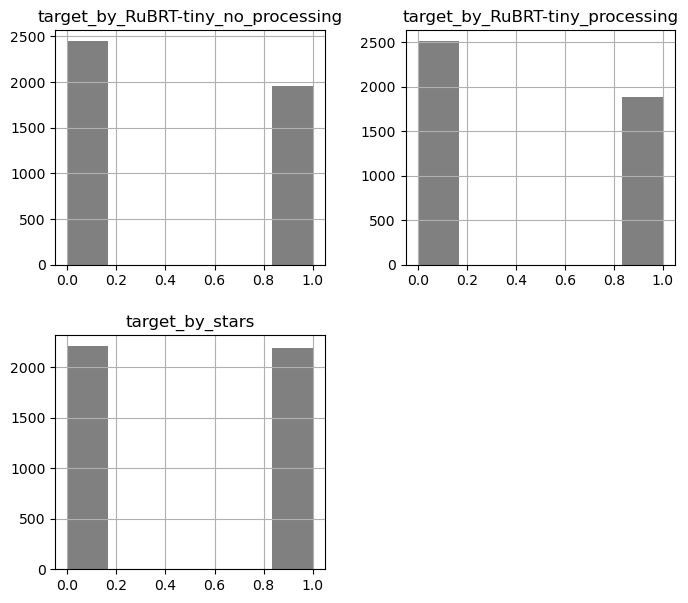

In [36]:
# Построим графики распределений целевых переменных
graphics_df = df[['target_by_RuBRT-tiny_no_processing', 'target_by_RuBRT-tiny_processing', 'target_by_stars']]
graphics_df.hist(figsize=(8, 7), bins=6, grid=True, color='gray');

In [37]:
data_target = []
for col in graphics_df:
    target_dict = {
    'target': col,
    'negative': df[col].value_counts()[0],
    'positive': df[col].value_counts()[1],
    }
    data_target.append(target_dict)
    
pd.DataFrame(data_target)

,target,negative,positive
0,target_by_RuBRT-tiny_no_processing,2444,1951
1,target_by_RuBRT-tiny_processing,2509,1886
2,target_by_stars,2207,2188


После всех преобразований мы получили 3 целевых признака. Признаки `target_by_RuBRT-tiny_no_processing`, `target_by_RuBRT-tiny_processing` распределились примерно одинаково, при этом негативных отзывов больше, чем позитивных. У признака `target_by_stars` количество позитивных и негативных почти равны. 

In [41]:
# сохраним полученный датафрейм для обработки
#df.to_csv('df_marking.csv', encoding='utf8', index=False)